# Kepler KOI Dataset Columns

- **kepid**: KepID  
- **kepoi_name**: KOI Name  
- **kepler_name**: Kepler Name  
- **koi_disposition**: Exoplanet Archive Disposition  
- **koi_pdisposition**: Disposition Using Kepler Data  
- **koi_score**: Disposition Score  
- **koi_fpflag_nt**: Not Transit-Like False Positive Flag  
- **koi_fpflag_ss**: Stellar Eclipse False Positive Flag  
- **koi_fpflag_co**: Centroid Offset False Positive Flag  
- **koi_fpflag_ec**: Ephemeris Match Indicates Contamination False Positive Flag  
- **koi_period**: Orbital Period [days]  
- **koi_period_err1**: Orbital Period Upper Uncertainty [days]  
- **koi_period_err2**: Orbital Period Lower Uncertainty [days]  
- **koi_time0bk**: Transit Epoch [BKJD]  
- **koi_time0bk_err1**: Transit Epoch Upper Uncertainty [BKJD]  
- **koi_time0bk_err2**: Transit Epoch Lower Uncertainty [BKJD]  
- **koi_impact**: Impact Parameter  
- **koi_impact_err1**: Impact Parameter Upper Uncertainty  
- **koi_impact_err2**: Impact Parameter Lower Uncertainty  
- **koi_duration**: Transit Duration [hrs]  
- **koi_duration_err1**: Transit Duration Upper Uncertainty [hrs]  
- **koi_duration_err2**: Transit Duration Lower Uncertainty [hrs]  
- **koi_depth**: Transit Depth [ppm]  
- **koi_depth_err1**: Transit Depth Upper Uncertainty [ppm]  
- **koi_depth_err2**: Transit Depth Lower Uncertainty [ppm]  
- **koi_prad**: Planetary Radius [Earth radii]  
- **koi_prad_err1**: Planetary Radius Upper Uncertainty [Earth radii]  
- **koi_prad_err2**: Planetary Radius Lower Uncertainty [Earth radii]  
- **koi_teq**: Equilibrium Temperature [K]  
- **koi_teq_err1**: Equilibrium Temperature Upper Uncertainty [K]  
- **koi_teq_err2**: Equilibrium Temperature Lower Uncertainty [K]  
- **koi_insol**: Insolation Flux [Earth flux]  
- **koi_insol_err1**: Insolation Flux Upper Uncertainty [Earth flux]  
- **koi_insol_err2**: Insolation Flux Lower Uncertainty [Earth flux]  
- **koi_model_snr**: Transit Signal-to-Noise  
- **koi_tce_plnt_num**: TCE Planet Number  
- **koi_tce_delivname**: TCE Delivery  
- **koi_steff**: Stellar Effective Temperature [K]  
- **koi_steff_err1**: Stellar Effective Temperature Upper Uncertainty [K]  
- **koi_steff_err2**: Stellar Effective Temperature Lower Uncertainty [K]  
- **koi_slogg**: Stellar Surface Gravity [log10(cm/s²)]  
- **koi_slogg_err1**: Stellar Surface Gravity Upper Uncertainty [log10(cm/s²)]  
- **koi_slogg_err2**: Stellar Surface Gravity Lower Uncertainty [log10(cm/s²)]  
- **koi_srad**: Stellar Radius [Solar radii]  
- **koi_srad_err1**: Stellar Radius Upper Uncertainty [Solar radii]  
- **koi_srad_err2**: Stellar Radius Lower Uncertainty [Solar radii]  
- **ra**: Right Ascension [decimal degrees]  
- **dec**: Declination [decimal degrees]  
- **koi_kepmag**: Kepler-band Magnitude [mag]  


In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
import pandas as pd
df = pd.read_csv('Data\cumulative_2025.10.03_07.59.03.csv')
df

,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,9561,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,9562,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,9563,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc_rowid          9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2747 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

# ExoNet Feature Mapping (KOI Dataset → Model Usage)

| KOI Column         | Description                                    | ExoNet Usage        |
|--------------------|------------------------------------------------|---------------------|
| **koi_period**     | Orbital Period [days]                          | Core Input Feature  |
| **koi_duration**   | Transit Duration [hrs]                         | Core Input Feature  |
| **koi_depth**      | Transit Depth [ppm]                            | Core Input Feature  |
| **koi_prad**       | Planetary Radius [Earth radii]                 | Core Input Feature  |
| **koi_model_snr**  | Transit Signal-to-Noise                        | Core Input Feature  |
| **koi_time0bk**    | Transit Epoch [BKJD]                           | Auxiliary Input (for phase folding / alignment) |
| **koi_impact**     | Impact Parameter                               | Auxiliary Input     |
| **koi_steff**      | Stellar Effective Temperature [K]              | Context Feature     |
| **koi_slogg**      | Stellar Surface Gravity [log10(cm/s²)]         | Context Feature     |
| **koi_srad**       | Stellar Radius [Solar radii]                   | Context Feature     |
| **koi_kepmag**     | Kepler-band Magnitude [mag]                    | Context Feature (affects noise/SNR) |
| **koi_disposition**| Exoplanet Archive Disposition (Confirmed / Candidate / False Positive) | Label (Target) |
| **koi_pdisposition** | Disposition Using Kepler Data                | Label / Validation Reference |
| **koi_score**      | Disposition Score (confidence metric)          | Label Confidence / Training Weight |
| **koi_fpflag_nt**  | Not Transit-Like False Positive Flag           | Label Metadata (helps refine negatives) |
| **koi_fpflag_ss**  | Stellar Eclipse False Positive Flag            | Label Metadata      |
| **koi_fpflag_co**  | Centroid Offset False Positive Flag            | Label Metadata      |
| **koi_fpflag_ec**  | Ephemeris Match Contamination False Positive Flag | Label Metadata  |

---

## Notes for ExoNet
- **Core Input Features** → go directly into the tabular branch of the model.  
- **Auxiliary Input Features** → used during preprocessing (e.g., phase folding, alignment).  
- **Context Features** → provide stellar/observational context for classification (help distinguish planet vs binary vs noise).  
- **Labels / Metadata** → used for supervised training, calibration, and evaluation.  

Final model pipeline:  
- Tabular features (`period`, `duration`, `depth`, `radius`, `SNR`, + stellar context)  
- CNN embeddings from folded light curves  
- Fusion layer → classifier → outputs **Calibrated Probabilities (planet / candidate / false positive)**  


In [4]:
# Columns needed for ExoNet
selected_columns = [
    # Core features
    "koi_period",
    "koi_duration",
    "koi_depth",
    "koi_prad",
    "koi_model_snr",

    # Auxiliary features
    "koi_time0bk",
    "koi_impact",

    # Stellar context
    "koi_steff",
    "koi_slogg",
    "koi_srad",
    "koi_kepmag",

    # Labels / metadata
    "koi_disposition",
    "koi_pdisposition",
    "koi_score",
    "koi_fpflag_nt",
    "koi_fpflag_ss",
    "koi_fpflag_co",
    "koi_fpflag_ec"
]

# Filter dataframe
exo_df = df[selected_columns]

# Quick look at the shape & first rows
print("Selected shape:", exo_df.shape)
exo_df.head()



Selected shape: (9564, 18)


,koi_period,koi_duration,koi_depth,koi_prad,koi_model_snr,koi_time0bk,koi_impact,koi_steff,koi_slogg,koi_srad,koi_kepmag,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec
0,9.488036,2.95750,615.8,2.26,35.8,170.538750,0.146,5455.0,4.467,0.927,15.347,CONFIRMED,CANDIDATE,1.000,0,0,0,0
1,54.418383,4.50700,874.8,2.83,25.8,162.513840,0.586,5455.0,4.467,0.927,15.347,CONFIRMED,CANDIDATE,0.969,0,0,0,0
2,19.899140,1.78220,10829.0,14.60,76.3,175.850252,0.969,5853.0,4.544,0.868,15.436,CANDIDATE,CANDIDATE,0.000,0,0,0,0
3,1.736952,2.40641,8079.2,33.46,505.6,170.307565,1.276,5805.0,4.564,0.791,15.597,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0
4,2.525592,1.65450,603.3,2.75,40.9,171.595550,0.701,6031.0,4.438,1.046,15.509,CONFIRMED,CANDIDATE,1.000,0,0,0,0


In [5]:
exo_df = exo_df.dropna(subset=["koi_disposition"])  # must have a label
exo_df = exo_df.fillna(df.mean(numeric_only=True))  # fill numeric NaNs with mean

# 4. Encode labels (target variable)
label_map = {"FALSE POSITIVE": 0, "CANDIDATE": 1, "CONFIRMED": 2}
exo_df["label"] = exo_df["koi_disposition"].map(label_map)

# Drop raw label columns we don’t use directly
exo_df = exo_df.drop(columns=["koi_disposition", "koi_pdisposition"])

# 5. Split features & labels
X = exo_df.drop(columns=["label"])
y = exo_df["label"]

# 6. Identify numeric features to scale
numeric_features = [
    "koi_period", "koi_duration", "koi_depth", "koi_prad", "koi_model_snr",
    "koi_time0bk", "koi_impact",
    "koi_steff", "koi_slogg", "koi_srad", "koi_kepmag", "koi_score"
]

binary_features = ["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec"]

# Scale numeric features
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_features] = scaler.fit_transform(X[numeric_features])

# Binary features stay as is

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Class distribution:\n", y.value_counts())

Train shape: (7651, 16)
Test shape: (1913, 16)
Class distribution:
 label
0    4839
2    2746
1    1979
Name: count, dtype: int64


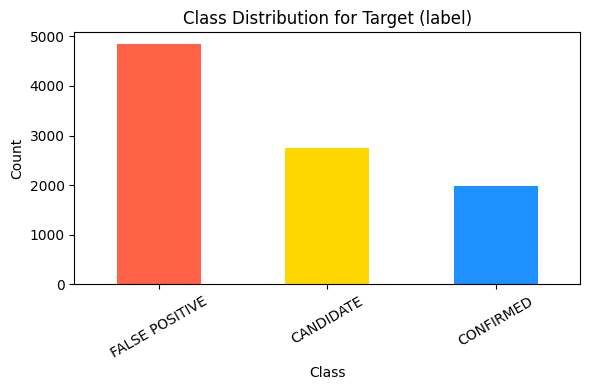

In [6]:
import matplotlib.pyplot as plt

# Visualize class distribution for the target column "label"
plt.figure(figsize=(6,4))
y.value_counts().plot(kind='bar', color=['tomato', 'gold', 'dodgerblue'])
plt.xticks(ticks=[0,1,2], labels=["FALSE POSITIVE", "CANDIDATE", "CONFIRMED"], rotation=30)
plt.title("Class Distribution for Target (label)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [7]:
X_train.describe()

,koi_period,koi_duration,koi_depth,koi_prad,koi_model_snr,koi_time0bk,koi_impact,koi_steff,koi_slogg,koi_srad,koi_kepmag,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec
count,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7.651000e+03,7651.000000,7651.000000,7651.000000,7651.000000
mean,0.002840,-0.011397,-0.003573,-0.012299,0.001574,0.003451,-0.005833,-0.000947,0.007394,-0.005262,-0.001798,6.582153e-03,0.220625,0.231342,0.198798,0.118808
std,1.117161,0.949398,0.974100,0.526610,1.007610,0.981051,0.942229,0.988753,0.978741,0.996731,0.996813,1.000563e+00,5.326903,0.421718,0.399121,0.323584
min,-0.056515,-0.860674,-0.294949,-0.034061,-0.332979,-0.672415,-0.223811,-3.897173,-10.047642,-0.269527,-5.268598,-1.098699e+00,0.000000,0.000000,0.000000,0.000000
25%,-0.054649,-0.491685,-0.292923,-0.033613,-0.317220,-0.491305,-0.160331,-0.469355,-0.186561,-0.148718,-0.598862,-1.098699e+00,0.000000,0.000000,0.000000,0.000000
50%,-0.049351,-0.283503,-0.289337,-0.033269,-0.301973,-0.423181,-0.053313,0.048848,0.287167,-0.120096,0.187247,-2.536868e-16,0.000000,0.000000,0.000000,0.000000
75%,-0.026580,0.090075,-0.269539,-0.027138,-0.205050,0.070963,0.041527,0.501796,0.539351,-0.050622,0.757880,1.174884e+00,0.000000,0.000000,0.000000,0.000000
max,97.342183,13.040579,11.131309,36.096719,11.267940,10.908592,30.467743,13.037192,2.483756,37.970046,4.142338,1.186309e+00,465.000000,1.000000,1.000000,1.000000


In [8]:
y_train.head()

6223    1
1591    1
7351    0
5868    0
2380    1
Name: label, dtype: int64

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Fit a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Print accuracy
print("Test accuracy:", accuracy_score(y_test, y_pred))


Test accuracy: 0.9283847360167277


In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["FALSE POSITIVE", "CANDIDATE", "CONFIRMED"]))

                precision    recall  f1-score   support

FALSE POSITIVE       0.99      0.99      0.99       968
     CANDIDATE       0.83      0.85      0.84       396
     CONFIRMED       0.90      0.88      0.89       549

      accuracy                           0.93      1913
     macro avg       0.90      0.91      0.91      1913
  weighted avg       0.93      0.93      0.93      1913



In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Fit a Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on test set
y_nb_pred = nb.predict(X_test)

# Print accuracy and classification report
print("Naive Bayes Test accuracy:", accuracy_score(y_test, y_nb_pred))
print(classification_report(y_test, y_nb_pred, target_names=["FALSE POSITIVE", "CANDIDATE", "CONFIRMED"]))

Naive Bayes Test accuracy: 0.8065865133298484
                precision    recall  f1-score   support

FALSE POSITIVE       0.99      0.90      0.94       968
     CANDIDATE       0.77      0.41      0.54       396
     CONFIRMED       0.62      0.93      0.75       549

      accuracy                           0.81      1913
     macro avg       0.79      0.75      0.74      1913
  weighted avg       0.84      0.81      0.80      1913



In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a deep neural network model (multi-layer perceptron)
dnn = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # 3 hidden layers, can adjust sizes
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42
)

# Fit the model
dnn.fit(X_train, y_train)

# Predict on test set
y_dnn_pred = dnn.predict(X_test)

# Print accuracy and classification report
print("Deep NN Test accuracy:", accuracy_score(y_test, y_dnn_pred))
print(classification_report(y_test, y_dnn_pred, target_names=["FALSE POSITIVE", "CANDIDATE", "CONFIRMED"]))

Deep NN Test accuracy: 0.8980658651332984
                precision    recall  f1-score   support

FALSE POSITIVE       0.99      0.98      0.98       968
     CANDIDATE       0.75      0.80      0.77       396
     CONFIRMED       0.86      0.82      0.84       549

      accuracy                           0.90      1913
     macro avg       0.86      0.87      0.87      1913
  weighted avg       0.90      0.90      0.90      1913



c:\Users\Victus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assume you have these (replace with your actual data)
# X_train: np.array or torch.Tensor, shape [n_samples, input_size]
# y_train: np.array or torch.Tensor, shape [n_samples], values 0-2
# X_test, y_test: similar

# Convert to tensors if not already
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.long)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.long)

# Create datasets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Data loaders
batch_size = 16  # Adjust based on your data size and memory
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Compute class weights for imbalance (optional but recommended for recall)
class_counts = np.bincount(y_train.numpy())
class_weights = 1. / class_counts
class_weights = torch.tensor(class_weights / class_weights.sum(), dtype=torch.float32)  # Normalize

In [14]:
X_train.shape

torch.Size([7651, 16])

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_features, out_features, dropout_rate=0.3):  # <-- fixed __init__
        super(ResidualBlock, self).__init__()  # <-- fixed __init__
        self.fc = nn.Linear(in_features, out_features)
        self.ln = nn.LayerNorm(out_features)  # Layer norm for better stability
        self.dropout = nn.Dropout(dropout_rate)
        
        # Projection if dimensions differ
        self.proj = nn.Linear(in_features, out_features) if in_features != out_features else nn.Identity()
    
    def forward(self, x):
        residual = self.proj(x)
        x = F.silu(self.ln(self.fc(x)))  # Swish activation
        x = self.dropout(x)
        return x + residual  # Skip connection


class ResidualMLP(nn.Module):
    def __init__(self, input_size=16, num_classes=3):  # <-- fixed __init__
        super(ResidualMLP, self).__init__()  # <-- fixed __init__
        self.entry = nn.Linear(input_size, 256)  # Entry layer
        
        # Residual blocks for depth
        self.res_block1 = ResidualBlock(256, 256)
        self.res_block2 = ResidualBlock(256, 128)
        self.res_block3 = ResidualBlock(128, 128)
        self.res_block4 = ResidualBlock(128, 64)
        
        self.dropout_final = nn.Dropout(0.2)
        self.fc_out = nn.Linear(64, num_classes)
    
    def forward(self, x):
        x = F.silu(self.entry(x))
        
        x = self.res_block1(x)
        x = self.res_block2(x)
        x = self.res_block3(x)
        x = self.res_block4(x)
        
        x = self.dropout_final(x)
        x = self.fc_out(x)  # Logits output
        return x


In [16]:
classes = np.unique(y_train)  # unique class labels
print("Classes:", classes)

Classes: [0 1 2]


In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

import torch
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Ensure y_train is numpy
if isinstance(y_train, torch.Tensor):
    y_train_np = y_train.cpu().numpy()
else:
    y_train_np = np.array(y_train)

# Get unique classes
classes = np.unique(y_train_np)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train_np
)

# Convert to tensor for PyTorch
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

print("Classes:", classes)
print("Class Weights:", class_weights)


# ---- Focal Loss with class weights ----
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha  # can be class weights tensor
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', weight=self.alpha)
        pt = torch.exp(-ce_loss)  # probability of true class
        focal_loss = (1 - pt) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        return focal_loss


# ---- Initialize with class weights ----
loss_fn = FocalLoss(alpha=class_weights, gamma=2.0)


Classes: [0 1 2]
Class Weights: tensor([0.6588, 1.6111, 1.1608], device='cuda:0')


In [22]:
print("CUDA Available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("Number of GPUs:", torch.cuda.device_count())
    print("Current Device Index:", torch.cuda.current_device())

CUDA Available: True
GPU Name: NVIDIA GeForce RTX 4070 Laptop GPU
Number of GPUs: 1
Current Device Index: 0


In [23]:
import torch
import torch.nn as nn
import numpy as np

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model
input_size = X_train.shape[1]  # number of features
model = ResidualMLP(input_size=input_size, num_classes=3).to(device)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

# Learning rate scheduler (ReduceLROnPlateau equivalent)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='max', factor=0.5, patience=6, min_lr=1e-6
)

# Early stopping setup
patience = 30
best_accuracy = 0.0
epochs_no_improve = 0
best_model_path = "best_residual_mlp_model.pth"

# Training loop
epochs = 300
for epoch in range(epochs):
    # --- Training ---
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0
    
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        
        loss = loss_fn(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()
    
    avg_train_loss = train_loss / len(train_loader)
    train_accuracy = 100 * correct / total

    # --- Evaluation on test set ---
    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            loss = loss_fn(outputs, batch_y)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total_test += batch_y.size(0)
            correct_test += (predicted == batch_y).sum().item()
    
    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = 100 * correct_test / total_test

    # --- Scheduler step ---
    old_lr = optimizer.param_groups[0]['lr']
    scheduler.step(test_accuracy)
    new_lr = optimizer.param_groups[0]['lr']
    if new_lr < old_lr:
        print(f"📉 Learning rate reduced from {old_lr:.6f} to {new_lr:.6f}")

    # --- Save best model ---
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        torch.save(model.state_dict(), best_model_path)
        print(f"✅ Saved new best model at epoch {epoch+1} with Test Accuracy: {best_accuracy:.2f}%")
        epochs_no_improve = 0  # reset patience counter
    else:
        epochs_no_improve += 1

    # --- Logging ---
    print(
        f"Epoch {epoch+1}/{epochs} | "
        f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}% | "
        f"Test Loss: {avg_test_loss:.4f}, Test Acc: {test_accuracy:.2f}%"
    )


print(f"\n🎯 Training finished. Best Test Accuracy: {best_accuracy:.2f}%")


✅ Saved new best model at epoch 1 with Test Accuracy: 87.77%
Epoch 1/300 | Train Loss: 0.2248, Train Acc: 79.44% | Test Loss: 0.1692, Test Acc: 87.77%
Epoch 2/300 | Train Loss: 0.1677, Train Acc: 84.16% | Test Loss: 0.1553, Test Acc: 84.06%
Epoch 3/300 | Train Loss: 0.1588, Train Acc: 84.41% | Test Loss: 0.1473, Test Acc: 86.83%
✅ Saved new best model at epoch 4 with Test Accuracy: 87.92%
Epoch 4/300 | Train Loss: 0.1552, Train Acc: 85.48% | Test Loss: 0.1582, Test Acc: 87.92%
✅ Saved new best model at epoch 5 with Test Accuracy: 88.50%
Epoch 5/300 | Train Loss: 0.1535, Train Acc: 85.75% | Test Loss: 0.1326, Test Acc: 88.50%
✅ Saved new best model at epoch 6 with Test Accuracy: 88.60%
Epoch 6/300 | Train Loss: 0.1513, Train Acc: 85.86% | Test Loss: 0.1395, Test Acc: 88.60%
Epoch 7/300 | Train Loss: 0.1482, Train Acc: 86.22% | Test Loss: 0.1890, Test Acc: 72.61%
✅ Saved new best model at epoch 8 with Test Accuracy: 88.97%
Epoch 8/300 | Train Loss: 0.1475, Train Acc: 85.90% | Test Loss: 

In [24]:
from sklearn.metrics import classification_report

# --- Evaluate on test set and generate classification report ---
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

# Generate report
print("\n📊 Classification Report:")
print(classification_report(all_labels, all_preds, digits=4))



📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9947    0.9783    0.9865       968
           1     0.7354    0.9192    0.8171       396
           2     0.9378    0.7960    0.8611       549

    accuracy                         0.9137      1913
   macro avg     0.8893    0.8978    0.8882      1913
weighted avg     0.9247    0.9137    0.9154      1913



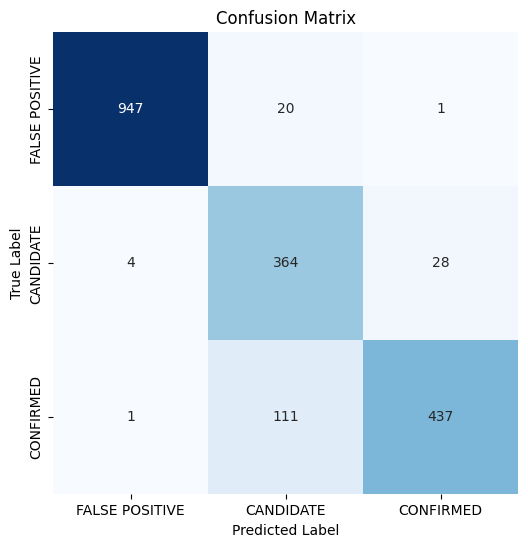

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Reverse map: from int → label
label_map = {"FALSE POSITIVE": 0, "CANDIDATE": 1, "CONFIRMED": 2}
inv_label_map = {v: k for k, v in label_map.items()}

# Put model in eval mode and collect predictions
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Create readable labels
labels = [inv_label_map[i] for i in sorted(inv_label_map.keys())]

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
